In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [13]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)

In [14]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [15]:
list(itertools.product(['Temperature','Rainfall'], ['50%', 'mean']))

[('Temperature', '50%'),
 ('Temperature', 'mean'),
 ('Rainfall', '50%'),
 ('Rainfall', 'mean')]

In [18]:
# check out the stats with a .describe()
df.groupby('Day').describe()[list(itertools.product(['Temperature','Rainfall'], ['50%', 'mean']))]

Temperature            Rainfall          
                  50%       mean      50%      mean
Day                                                
Friday          61.50  61.134615     0.74  0.817115
Monday          60.65  60.888462     0.74  0.823462
Saturday        63.45  64.021154     0.77  0.823077
Sunday          61.10  59.769811     0.74  0.873585
Thursday        60.35  61.125000     0.77  0.812500
Tuesday         60.95  59.944231     0.74  0.829423
Wednesday       62.00  61.717308     0.77  0.801731

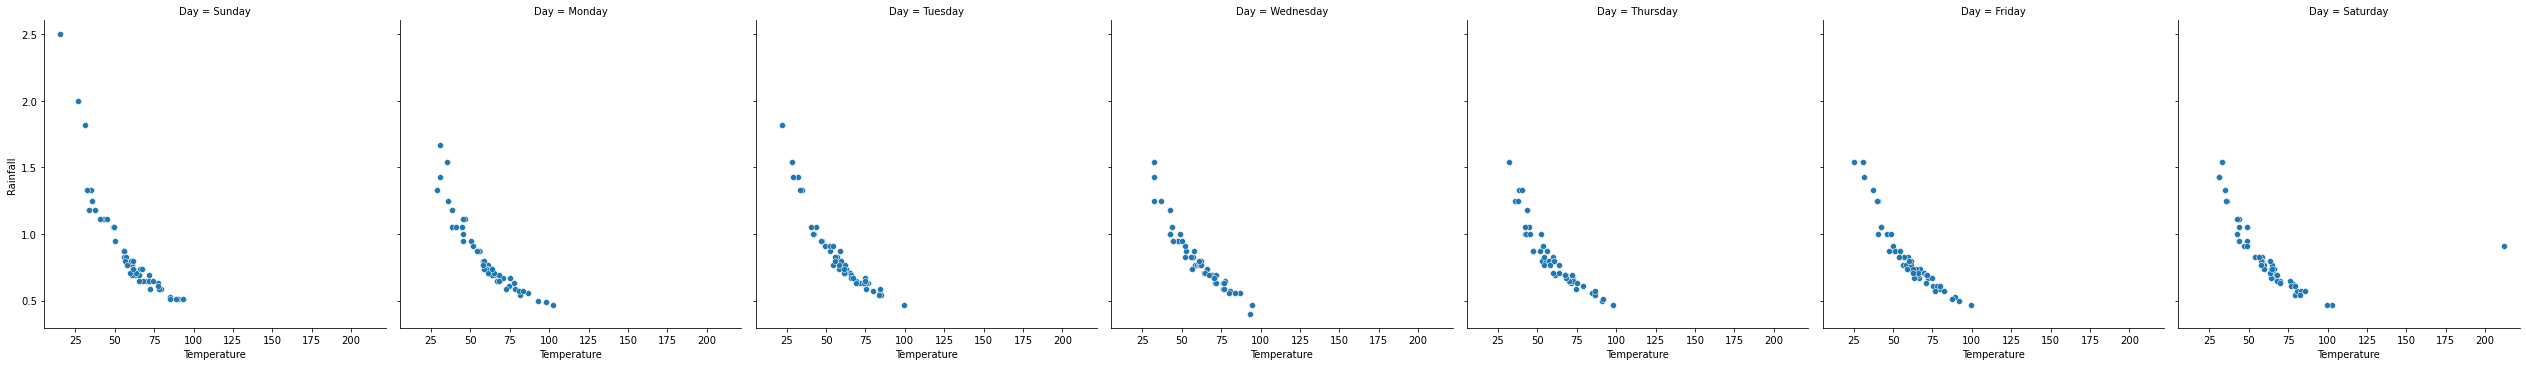

In [19]:
sns.relplot(x='Temperature', y='Rainfall', col='Day', data=df)

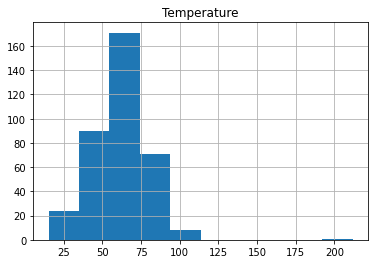

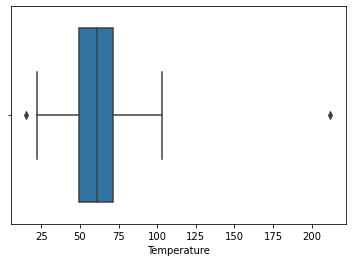

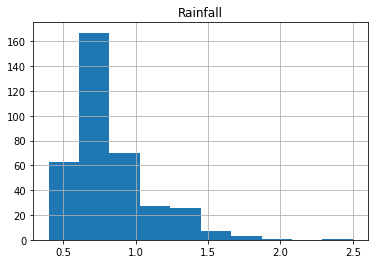

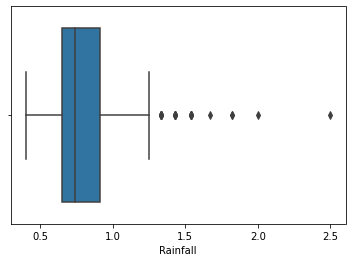

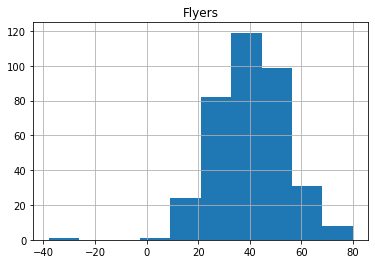

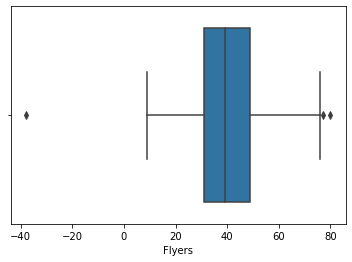

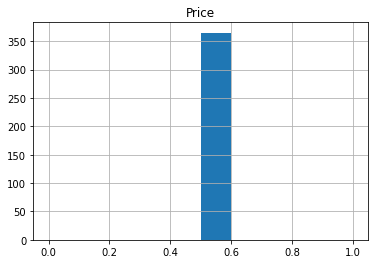

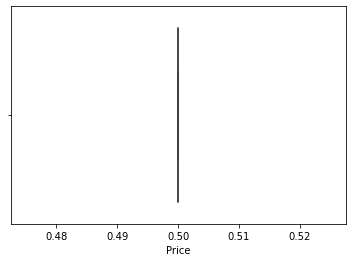

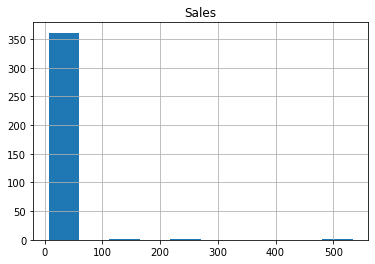

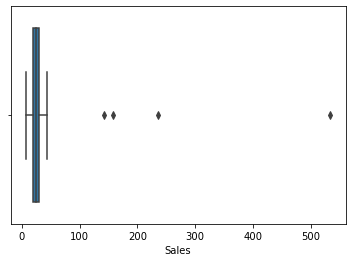

In [20]:
# create histograms for each column to look for outliers and check distribution
# iterate through columns
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

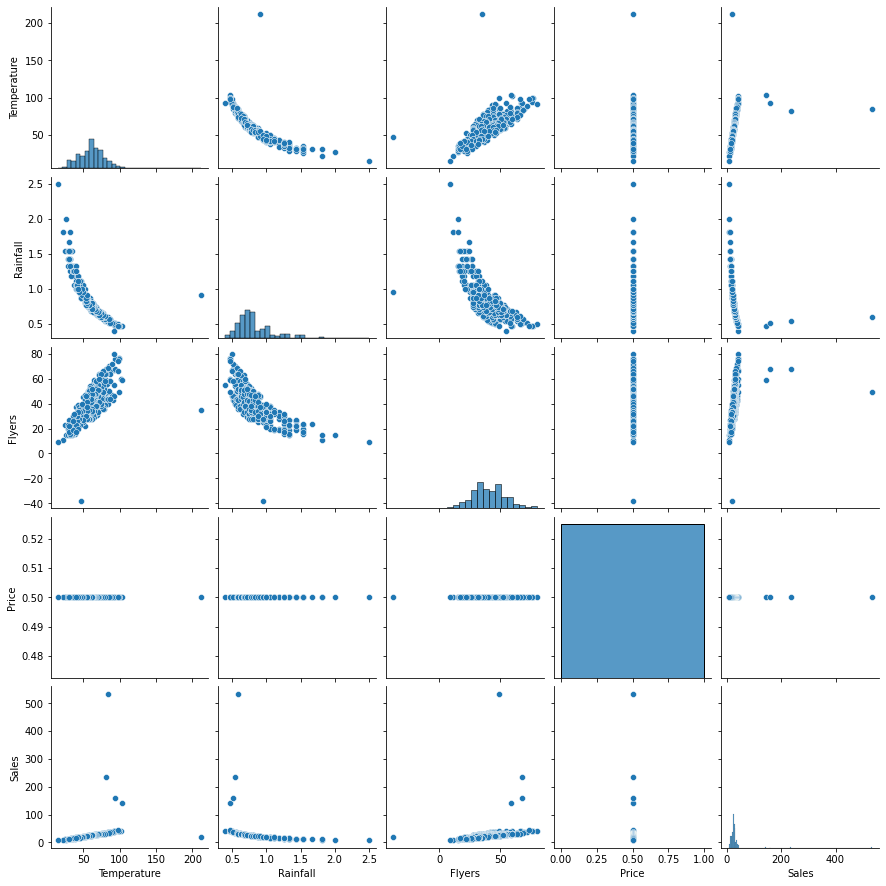

In [21]:
sns.pairplot(df)

## Using z-score

# Using IQR
 steps to defining IQR/Tukey method:
 get the Q1 and Q3 values
 determine our multiplier
 use these qualities to assert abnormalities

In [22]:
# let's examine sales
df.Sales.quantile(0.25)

20.0

In [23]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)

In [25]:
# find IQR
iqr = q3 - q1
iqr

10.0

In [ ]:
# inner or outer: 1.5 fence multiplier convention for inner, 3.0 mult convention for outer
# lower: q1 - mult* iqr
# upper: q3 + iqr*mult

In [26]:
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [29]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Sales'] < inner_lower_fence) | (df['Sales'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [ ]:
# displayed above are the datapoints whose sales are below or above the inner fences

# z-score:
subtract the data point from the mean, divide by the standard deviation

score calculation:
 (x - x_mean) / x_std

In [30]:
z_scores = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()

In [31]:
##################### Start of Exercises. ##################

Using lemonade.csv dataset and focusing on continuous variables:

1.Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

2.Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

3.Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

4.Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [33]:
# 1.Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers
# of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers 
# make sense?Which outliers should be kept?

#2.Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers
#of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers 
#make sense?Which outliers should be kept?

# start with the sales column
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)

# find IQR
iqr = q3 - q1
iqr

10.0

In [36]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(5.0, 45.0)

In [37]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Sales'] < inner_lower_fence) | (df['Sales'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


### these outliers make sense they are far above the upper inner fence of 45 but it is possible these were very hot days or there was some event going on in the are that caused the lemondade to be in a better location than usual. I would keep them all.

In [40]:
# moving on to the Price column
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)

In [41]:
# find IQR
iqr = q3 - q1
iqr

0.0

In [42]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(0.5, 0.5)

In [43]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Price'] < inner_lower_fence) | (df['Price'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


### there are no outliers probably because price remains the same on the one product

In [45]:
# next up the Flyers column
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Flyers.quantile(0.25)
q3 = df.Flyers.quantile(0.75)

In [46]:
# find IQR
iqr = q3 - q1
iqr

18.0

In [47]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(4.0, 76.0)

In [48]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Flyers'] < inner_lower_fence) | (df['Flyers'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


### the entry of -38 flyers is probably an error and is meant to be 38

In [50]:
# next up the Rainfall column
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)

In [51]:
# find IQR
iqr = q3 - q1
iqr

0.26

In [52]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(0.26, 1.3)

In [53]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Rainfall'] < inner_lower_fence) | (df['Rainfall'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


### all of these entries though outside of the fence seem likely to have been true reports so I would keep all of these. I'll even keep the 2.5 entry because there are rain storms and other storms that produce excessive rain to consider so this is not an outlandish amount of rainfall

In [54]:
# next up the Temperature column
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)

In [55]:
# find IQR
iqr = q3 - q1
iqr

22.0

In [56]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(16.700000000000003, 104.7)

In [57]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Temperature'] < inner_lower_fence) | (df['Temperature'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


### since 212 degrees F is the boiling point of water I think this would be an entry error not sure what the person recording would have meant to enter so I would drop this.  15 degrees is just outside of the lower fence so it is probable that this temperature did occur

3.Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

4.Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [59]:
# back to the Sales column
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Sales.quantile(0.25)
q3 = df.Sales.quantile(0.75)

# find IQR
iqr = q3 - q1
iqr

10.0

In [60]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(-10.0, 60.0)

In [61]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Sales'] < inner_lower_fence) | (df['Sales'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


### these are the same ones that i got with a multiplier of 1.5 so I have the same answer
-these outliers make sense they are far above the upper inner fence of 45 but it is possible these were very hot days or there was some event going on in the are that caused the lemondade to be in a better location than usual. I would keep them all.

In [62]:
# now lets revist Price
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)

In [63]:
# find IQR
iqr = q3 - q1
iqr

0.0

In [64]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(0.5, 0.5)

In [65]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Price'] < inner_lower_fence) | (df['Price'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


### none the same as when the multiplier is at 1.5 because the price remains constant

In [66]:
# next up the Rainfall column
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Rainfall.quantile(0.25)
q3 = df.Rainfall.quantile(0.75)

In [67]:
# find IQR
iqr = q3 - q1
iqr

0.26

In [68]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(-0.13, 1.69)

In [69]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Rainfall'] < inner_lower_fence) | (df['Rainfall'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


### these are only the most outside outliers but still seem reasonable so I'll keep them

In [70]:
# next up the Temperature column
# start with an inner fence calculation
multiplier = 3
# calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)

In [72]:
# find IQR
iqr = q3 - q1
iqr

22.0

In [73]:
# establish the lower and upper fence
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

inner_lower_fence, inner_upper_fence

(-16.299999999999997, 137.7)

In [74]:
# make a column that included data points less than the inner lower fence OR points more
# than the inner upper fence
df[(df['Temperature'] < inner_lower_fence) | (df['Temperature'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


### this is the same outlier I addressed previously which I noted was an error in entry  and I would drop this one